Importing Libraries

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
import phik
from category_encoders import TargetEncoder
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

Reading train and test csv files

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
y = train['y']

In [4]:
##Categorical columns
cat_columns=[]
for i in train.columns:
    if train[i].dtype =='O' or train[i].dtype =='float64':
        cat_columns.append(i)

In [5]:
##Categorical train data
cat_train = train[cat_columns]
##Categorical test data
cat_columns.remove('y')
cat_test = test[cat_columns]

##Target encoding categorical features wrt 'y'
for i in cat_columns:
    en = TargetEncoder()
    en.fit(train[i],train['y'])
    cat_train[i] = en.transform(train[i])
    cat_test[i] = en.transform(test[i])



##### Corelation matrix using phik

In [6]:
corelation_mat = train.phik_matrix()

interval columns not set, guessing: ['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 

In [7]:
##Binary data
binary_columns=[]
for i in train.columns:
    if train[i].dtype =='int64':
        binary_columns.append(i)
binary_train = train[binary_columns]
binary_test = test[binary_columns]
binary_train = pd.concat((train['y'],binary_train),axis=1)

Top 275 corelated features wrt to 'y'

In [8]:
top_275_features = corelation_mat['y'].sort_values(ascending=False)[0:275]

In [9]:
top_275_features=top_275_features.drop('y')

Data with top 275 features

In [10]:
X1_train = cat_train.drop('y',axis=1)
X1_train = pd.concat([train['y'],X1_train],axis=1)
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

In [11]:
X1_train = X1_train[top_275_features.index]
X1_test = X1_test[top_275_features.index]

In [12]:
y1 = train['y']

Full data

In [13]:
# X2_train = cat_train.drop('y',axis=1)
# X2_train = pd.concat([train['y'],X2_train],axis=1)
X2_train = pd.concat((cat_train,binary_train),axis=1)
X2_train = X2_train.drop('y',axis=1)
X2_test = pd.concat((cat_test,binary_test),axis=1)

In [14]:
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1_train, y, test_size=0.2)
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2_train, y, test_size=0.2)

#### Linear regression

###### Linear regression on selected data

In [15]:
lr = LinearRegression()
lr.fit(X1_train,y1_train)
print('R2 score for Linear Regression on train data is :',r2_score(y1_train,lr.predict(X1_train)))

R2 score for Linear Regression on train data is : 0.6381246684734339


In [16]:
print('R2 score for Linear Regression on valid data is :',r2_score(y1_valid,lr.predict(X1_valid)))

R2 score for Linear Regression on valid data is : -78243339657904.05


###### Linear regression on full data

In [198]:
lr = LinearRegression()
lr.fit(X2_train,y2_train)
print('R2 score for Linear Regression is for full data:',r2_score(y2_train,lr.predict(X2_train)))

R2 score for Linear Regression is for full data: 0.6531049594823184


In [199]:
print('R2 score for Linear Regression is for full data:',r2_score(y2_valid,lr.predict(X2_valid)))

R2 score for Linear Regression is for full data: 0.4226598930192995


###### SVR on Selected data

In [206]:
svm = SVR()
svm.fit(X1_train,y1_train)

SVR()

In [207]:
print('R2 score for SVM on Seleted data is :',r2_score(y1_train,svm.predict(X1_train)))

R2 score for SVM on Seleted data is : -0.010166496148364734


###### SVR on Full data

In [208]:
svm = SVR()
svm.fit(X2_train,y2_train)
print('R2 score for SVM on full data is :',r2_score(y2_train,svm.predict(X2_train)))

R2 score for SVM on full data is : -0.008214247008105469


###### Decision Tree on Selected data

In [209]:
tree = DecisionTreeRegressor()
param = {'max_depth':[1,3,5,7,9,10]}
clf_dt = GridSearchCV(tree,param_grid=param,cv=5,scoring='r2',return_train_score=True)

In [210]:
clf_dt.fit(X1_train,y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 10]},
             return_train_score=True, scoring='r2')

In [211]:
clf_dt.best_params_

{'max_depth': 3}

In [212]:
best_dt= DecisionTreeRegressor(max_depth=3)
best_dt.fit(X1_train,y1_train)
print('R2 score for Decision Tree on selected data is :',r2_score(y1_train,best_dt.predict(X1_train)))

R2 score for Decision Tree on selected data is : 0.5737349101918459


In [213]:
print('R2 score for Decision tree in full data is :',r2_score(y1_valid,best_dt.predict(X1_valid)))

R2 score for Decision tree in full data is : 0.5661556676731464


###### Decision tree on Full data

In [35]:
tree = DecisionTreeRegressor()
param = {'max_depth':[1,3,5,7,9,10]}
clf_dt = GridSearchCV(tree,param_grid=param,cv=5,scoring='r2',return_train_score=True)
clf_dt.fit(X2_train,y2_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 10]},
             return_train_score=True, scoring='r2')

In [36]:
clf_dt.best_params_

{'max_depth': 3}

In [38]:
best_dt= DecisionTreeRegressor(max_depth=3)
best_dt.fit(X2_train,y2_train)
print('R2 score for Decision Tree on train data is :',r2_score(y2_train,best_dt.predict(X2_train)))

R2 score for Decision Tree on train data is : 0.5752205300708422


In [39]:
print('R2 score for Decision tree on valid data is :',r2_score(y2_valid,best_dt.predict(X2_valid)))

R2 score for Decision tree on valid data is : 0.5654699898167967


###### XGBoost on Selected data

In [20]:
##ref:https://www.kaggle.com/anokas/mercedes-eda-xgboost-starter-0-55
x_train, x_valid, y_train, y_valid = train_test_split(X1_train, y, test_size=0.2)
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(X1_test)

params = {
    'objective':'reg:linear',
    'eta':0.02,
    'max_depth':4
}

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[12:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.91097	valid-rmse:99.18573	train-r2:-60.62993	valid-r2:-57.34222
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:80.97697	valid-rmse:81.24595	train-r2:-40.30719	valid-r2:-38.14605
[20]	train-rmse:66.35138	valid-rmse:66.61826	train-r2:-26.73337	valid-r2:-25.31910
[30]	train-rmse:54.43646	valid-rmse:54.70403	train-r2:-17.66734	valid-r2:-16.74692
[40]	train-rmse:44.74444	valid-rmse:45.01718	train-r2:-11.61191	valid-r2:-11.01824
[50]	train-rmse:36.87736	valid-rmse:37.16115	train-r2:-7.56687	valid-r2:-7.18960
[60]	train-rmse:30.50999	valid-rmse:30.81019	train-r2:-4.86391	valid-r2:-4.62955
[70]	train-rmse:25.37878	valid-rmse:25.70423	train-r2:-3.05736	valid-r2:-2.91826
[80]	train-rmse:21.26670	

In [40]:
print('R2 score for train data using XGboost is 0.64 and valid data is 0.554')

R2 score for train data using XGboost is 0.64 and valid data is 0.554


In [75]:
pred = clf.predict(d_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred


In [76]:
prediction.to_csv('predictions.csv',index=False)

###### Xg boost on full data

In [24]:
x_train, x_valid, y_train, y_valid = train_test_split(X2_train, y, test_size=0.2)
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(X2_test)

params = {
    'objective':'reg:linear',
    'eta':0.02,
    'max_depth':4
}

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[12:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.97635	valid-rmse:98.92542	train-r2:-61.51933	valid-r2:-54.33728
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.03057	valid-rmse:81.04041	train-r2:-40.90340	valid-r2:-36.13686
[20]	train-rmse:66.39546	valid-rmse:66.45718	train-r2:-27.13378	valid-r2:-23.97387
[30]	train-rmse:54.47268	valid-rmse:54.57956	train-r2:-17.93690	valid-r2:-15.84465
[40]	train-rmse:44.77464	valid-rmse:44.92322	train-r2:-11.79427	valid-r2:-10.41152
[50]	train-rmse:36.90358	valid-rmse:37.09038	train-r2:-7.69137	valid-r2:-6.77901
[60]	train-rmse:30.53471	valid-rmse:30.75930	train-r2:-4.95030	valid-r2:-4.35001
[70]	train-rmse:25.40279	valid-rmse:25.66539	train-r2:-3.11827	valid-r2:-2.72476
[80]	train-rmse:21.29255	

In [144]:
print('R2 score for train data using XGboost is 0.63 and valid data is 0.59')

R2 score for train data using XGboost is 0.63 and valid data is 0.59


#### Considering data with y values less than 160

In [41]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [42]:
train = train[train['y']<160]

In [43]:
##Categorical features
cat_columns=[]
for i in train.columns:
    if train[i].dtype =='O' or train[i].dtype =='float64':
        cat_columns.append(i)

In [44]:
##Categorical train data
cat_train = train[cat_columns]
##Categorical test data
cat_columns.remove('y')
cat_test = test[cat_columns]

##Target encoding categorical features
for i in cat_columns:
    en = TargetEncoder()
    en.fit(train[i],train['y'])
    cat_train[i] = en.transform(train[i])
    cat_test[i] = en.transform(test[i])

corelation_mat = train.phik_matrix()

interval columns not set, guessing: ['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 

In [45]:
####Binary data
binary_columns=[]
for i in train.columns:
    if train[i].dtype =='int64':
        binary_columns.append(i)
binary_train = train[binary_columns]
binary_test = test[binary_columns]
binary_train = pd.concat((train['y'],binary_train),axis=1)

#### Top 275 features wrt 'y'

In [46]:
top_275_features = corelation_mat['y'].sort_values(ascending=False)[0:275]
top_275_features=top_275_features.drop('y')

##### Data with selected features and without outliers

In [47]:
X1_train = cat_train.drop('y',axis=1)
X1_train = pd.concat([train['y'],X1_train],axis=1)
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

In [48]:
X1_train = X1_train[top_275_features.index]
X1_test = X1_test[top_275_features.index]
y = train['y']

##### Full data without outliers

In [49]:
X2_train = pd.concat((cat_train,binary_train),axis=1)
X2_train = X2_train.drop('y',axis=1)
X2_test = pd.concat((cat_test,binary_test),axis=1)
y = train['y']

##### Splitting the data 

In [50]:
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1_train, y, test_size=0.2)
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2_train, y, test_size=0.2)

##### Linear regression on Selected data

In [52]:
lr = LinearRegression()
lr.fit(X1_train,y1_train)
print('R2 score for Linear Regression on train data is :',r2_score(y1_train,lr.predict(X1_train)))

R2 score for Linear Regression is : 0.6415415160611041


In [53]:
print('R2 score for Linear Regression on valid data is :',r2_score(y1_valid,lr.predict(X1_valid)))

R2 score for Linear Regression on valid data is : 0.6192322257137142


##### Linear regression on Full data

In [55]:
lr = LinearRegression()
lr.fit(X2_train,y2_train)
print('R2 score for Linear Regression on full train data is :',r2_score(y2_train,lr.predict(X2_train)))

R2 score for Linear Regression on full train data is : 0.641123846674799


In [56]:
print('R2 score for Linear Regression on full valid data is :',r2_score(y2_valid,lr.predict(X2_valid)))

R2 score for Linear Regression on full valid data is : 0.6153497085251409


##### Decision Trees on selected data

In [57]:
tree = DecisionTreeRegressor()
param = {'max_depth':[1,3,5,7,9,10]}
clf_dt = GridSearchCV(tree,param_grid=param,cv=5,scoring='r2',return_train_score=True)

In [58]:
clf_dt.fit(X1_train,y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 10]},
             return_train_score=True, scoring='r2')

In [59]:
clf_dt.best_params_

{'max_depth': 3}

In [60]:
best_dt= DecisionTreeRegressor(max_depth=3)
best_dt.fit(X1_train,y1_train)
print('R2 score for Decision tree on train data is :',r2_score(y1_train,best_dt.predict(X1_train)))

R2 score for Decision tree on train data is : 0.6079404030091478


In [62]:
print('R2 score for Decision tree on valid data is :',r2_score(y1_valid,best_dt.predict(X1_valid)))

R2 score for Decision tree on valid data is : 0.6108668051047201


##### Decision trees on full data

In [63]:
best_dt= DecisionTreeRegressor(max_depth=3)
best_dt.fit(X2_train,y2_train)
print('R2 score for decision tree on full  train data is :',r2_score(y2_train,best_dt.predict(X2_train)))

R2 score for decision tree on full  train data is : 0.6053450408160868


In [64]:
print('R2 score for decision tree on full  valid data is :',r2_score(y2_valid,best_dt.predict(X2_valid)))

R2 score for decision tree on full  valid data is : 0.6395911554721558


##### XGBoost on selected data

In [29]:
x_train, x_valid, y_train, y_valid = train_test_split(X1_train, y, test_size=0.2, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(X1_test)
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[12:08:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.88277	valid-rmse:98.52879	train-r2:-63.42588	valid-r2:-66.02737
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:80.93784	valid-rmse:80.52148	train-r2:-42.16406	valid-r2:-43.76611
[20]	train-rmse:66.29969	valid-rmse:65.83151	train-r2:-27.96291	valid-r2:-28.92219
[30]	train-rmse:54.37009	valid-rmse:53.85715	train-r2:-18.47777	valid-r2:-19.02685
[40]	train-rmse:44.66106	valid-rmse:44.11460	train-r2:-12.14247	valid-r2:-12.43664
[50]	train-rmse:36.77374	valid-rmse:36.20433	train-r2:-7.91035	valid-r2:-8.04997
[60]	train-rmse:30.38255	valid-rmse:29.79469	train-r2:-5.08230	valid-r2:-5.12920
[70]	train-rmse:25.22331	valid-rmse:24.61866	train-r2:-3.19202	valid-r2:-3.18461
[80]	train-rmse:21.08108	

In [65]:
print('R2 score for train data using XGboost is 0.66 and on valid data is 0.62')

R2 score for train data using XGboost is 0.66 and on valid data is 0.62


##### Xgboost on full data

In [47]:
x_train, x_valid, y_train, y_valid = train_test_split(X2_train, y, test_size=0.2, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(X2_test)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[12:53:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.88277	valid-rmse:98.52879	train-r2:-63.42588	valid-r2:-66.02737
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:80.93784	valid-rmse:80.52148	train-r2:-42.16406	valid-r2:-43.76611
[20]	train-rmse:66.29969	valid-rmse:65.83151	train-r2:-27.96291	valid-r2:-28.92219
[30]	train-rmse:54.37009	valid-rmse:53.85715	train-r2:-18.47777	valid-r2:-19.02685
[40]	train-rmse:44.66106	valid-rmse:44.11460	train-r2:-12.14247	valid-r2:-12.43664
[50]	train-rmse:36.77374	valid-rmse:36.20433	train-r2:-7.91035	valid-r2:-8.04997
[60]	train-rmse:30.38255	valid-rmse:29.79469	train-r2:-5.08230	valid-r2:-5.12920
[70]	train-rmse:25.22331	valid-rmse:24.61866	train-r2:-3.19202	valid-r2:-3.18461
[80]	train-rmse:21.08107	

In [66]:
print('R2 score for train data using XGboost on full data is 0.65 and valid data is 0.61')

R2 score for train data using XGboost on full data is 0.65 and valid data is 0.61


### Label Encoded Features

In [232]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [233]:
y = train['y']

In [234]:
##Categorical columns
cat_columns=[]
for i in train.columns:
    if train[i].dtype =='O' or train[i].dtype =='float64':
        cat_columns.append(i)

In [235]:
##Categorical train data
##Categorical train data
cat_train = train[cat_columns]
##Categorical test data
cat_columns.remove('y')
cat_test = test[cat_columns]

##Label encoding categorical features
for i in cat_columns:
    en = LabelEncoder()
    en.fit(list(train[i].values)+list(test[i].values))
    cat_train[i] = en.transform(train[i])
    cat_test[i] = en.transform(test[i])

In [236]:
##Binary data
binary_columns=[]
for i in train.columns:
    if train[i].dtype =='int64':
        binary_columns.append(i)
binary_train = train[binary_columns]
binary_test = test[binary_columns]
binary_train = pd.concat((train['y'],binary_train),axis=1)

##### Data with label encoded features and binary data

In [237]:
X1_train = cat_train.drop('y',axis=1)
X1_train = pd.concat([train['y'],X1_train],axis=1)
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

##### Selecting top 275 corelated features

In [238]:
X1_train = X1_train[top_275_features.index]
X1_test = X1_test[top_275_features.index]

###### Full data

In [239]:
X2_train = pd.concat((cat_train,binary_train),axis=1)
X2_train = X2_train.drop('y',axis=1)
X2_test = pd.concat((cat_test,binary_test),axis=1)
y = train['y']

##### Splitting the data

In [240]:
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1_train, y, test_size=0.2)
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2_train, y, test_size=0.2)

##### Linear Regression on Selected data

In [226]:
lr = LinearRegression()
lr.fit(X1_train,y1_train)
print('R2 score for Linear Regression on train data is :',r2_score(y1_train,lr.predict(X1_train)))

R2 score for Linear Regression on train data is : 0.5758466245895174


In [78]:
print('R2 score for Linear Regression on valid data is :',r2_score(y1_valid,lr.predict(X1_valid)))

R2 score for Linear Regression on valid data is : 0.5931220988550634


##### Linear regression in Full data

In [79]:
lr = LinearRegression()
lr.fit(X2_train,y2_train)
print('R2 score for Linear Regression on full train data is :',r2_score(y2_train,lr.predict(X2_train)))

R2 score for Linear Regression on full train data is : 0.6276942941883861


In [80]:
print('R2 score for Linear Regression on full train data is :',r2_score(y2_valid,lr.predict(X2_valid)))

R2 score for Linear Regression on full train data is : 0.41705357198328064


SVM on Selected data

In [242]:
svm = SVR()
svm.fit(X1_train,y1_train)
print('R2 score for Svm on seleted data is :',r2_score(y1_train,svm.predict(X1_train)))

R2 score for Svm on seleted data is : -0.010049537965354904


Svm on full data

In [243]:
svm = SVR()
svm.fit(X2_train,y2_train)
print('R2 score for SVM on full data is :',r2_score(y2_train,svm.predict(X2_train)))

R2 score for SVM on full data is : -0.012158387017807248


##### Decision Tree on Selected data

In [81]:
tree = DecisionTreeRegressor()
param = {'max_depth':[1,3,5,7,9,10]}
clf_dt = GridSearchCV(tree,param_grid=param,cv=5,scoring='r2',return_train_score=True)

In [82]:
clf_dt.fit(X1_train,y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 10]},
             return_train_score=True, scoring='r2')

In [83]:
clf_dt.best_params_

{'max_depth': 3}

In [84]:
best_dt= DecisionTreeRegressor(max_depth=3)
best_dt.fit(X1_train,y1_train)
print('R2 score for Decision tree on train data is :',r2_score(y1_train,best_dt.predict(X1_train)))

R2 score for Linear Regression is : 0.5635840981489288


In [86]:
print('R2 score for Decision tree on valid data is :',r2_score(y1_valid,best_dt.predict(X1_valid)))

R2 score for Decision tree on valid data is : 0.6072926275449457


##### Decision trees on full data

In [88]:
best_dt= DecisionTreeRegressor(max_depth=3)
best_dt.fit(X2_train,y2_train)
print('R2 score for Decision tree on full train data is :',r2_score(y2_train,best_dt.predict(X2_train)))

R2 score for Decision tree on full train data is : 0.6021680207977209


In [89]:
print('R2 score for Decision tree on full valid data is :',r2_score(y2_valid,best_dt.predict(X2_valid)))

R2 score for Decision tree on full valid data is : 0.46513692320628663


##### XGBoost on selected data

In [46]:
x_train, x_valid, y_train, y_valid = train_test_split(X1_train, y, test_size=0.2, random_state=4242)
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(X1_test)

In [47]:
watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[11:25:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:99.13973	valid-rmse:98.25376	train-r2:-58.34264	valid-r2:-67.62468
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.18323	valid-rmse:80.27140	train-r2:-38.79276	valid-r2:-44.80403
[20]	train-rmse:66.54102	valid-rmse:65.59669	train-r2:-25.73316	valid-r2:-29.58764
[30]	train-rmse:54.61489	valid-rmse:53.63052	train-r2:-17.00917	valid-r2:-19.44589
[40]	train-rmse:44.91724	valid-rmse:43.88424	train-r2:-11.18141	valid-r2:-12.68986
[50]	train-rmse:37.05044	valid-rmse:35.96449	train-r2:-7.28816	valid-r2:-8.19453
[60]	train-rmse:30.69023	valid-rmse:29.53708	train-r2:-4.68685	valid-r2:-5.20179
[70]	train-rmse:25.57155	valid-rmse:24.34564	train-r2:-2.94807	valid-r2:-3.21332
[80]	train-rmse:21.47761	

In [90]:
print('R2 score on train data using XGboost is 0.58 and valid data is 0.655')

R2 score on train data using XGboost is 0.58 and valid data is 0.655


In [58]:
pred = clf.predict(d_test1)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('predictions1.csv',index=False)

##### Xgboost on full data

In [61]:
x_train, x_valid, y_train, y_valid = train_test_split(X2_train, y, test_size=0.2, random_state=4242)
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(X2_test)
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[12:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:99.13973	valid-rmse:98.25376	train-r2:-58.34264	valid-r2:-67.62468
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.18323	valid-rmse:80.27140	train-r2:-38.79276	valid-r2:-44.80403
[20]	train-rmse:66.54102	valid-rmse:65.59669	train-r2:-25.73316	valid-r2:-29.58764
[30]	train-rmse:54.61489	valid-rmse:53.63052	train-r2:-17.00917	valid-r2:-19.44589
[40]	train-rmse:44.91724	valid-rmse:43.88424	train-r2:-11.18141	valid-r2:-12.68986
[50]	train-rmse:37.05044	valid-rmse:35.96449	train-r2:-7.28816	valid-r2:-8.19453
[60]	train-rmse:30.69023	valid-rmse:29.53708	train-r2:-4.68685	valid-r2:-5.20179
[70]	train-rmse:25.57155	valid-rmse:24.34564	train-r2:-2.94807	valid-r2:-3.21332
[80]	train-rmse:21.47761	

In [91]:
print('R2 score on train data using XGboost is 0.58 and on valid data is 0.65')

R2 score on train data using XGboost is 0.58 and on valid data is 0.65


#### Considering data with y values less than 160

In [92]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [93]:
train = train[train['y']<160]
y = train['y']

In [94]:
##Categorical features
cat_columns=[]
for i in train.columns:
    if train[i].dtype =='O' or train[i].dtype =='float64':
        cat_columns.append(i)

In [95]:
##Categorical train data
cat_train = train[cat_columns]
##Categorical test data
cat_columns.remove('y')
cat_test = test[cat_columns]

##Label encoding categorical features
for i in cat_columns:
    en = LabelEncoder()
    en.fit(list(train[i].values)+list(test[i].values))
    cat_train[i] = en.transform(train[i])
    cat_test[i] = en.transform(test[i])

In [96]:
##Binary data
binary_columns=[]
for i in train.columns:
    if train[i].dtype =='int64':
        binary_columns.append(i)
binary_train = train[binary_columns]
binary_test = test[binary_columns]
binary_train = pd.concat((train['y'],binary_train),axis=1)

##### Data with Label encoded features and binary data without outliers

In [97]:
X1_train = cat_train.drop('y',axis=1)
X1_train = pd.concat([train['y'],X1_train],axis=1)
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

#### Data with Selected features

In [98]:
X1_train = X1_train[top_275_features.index]
X1_test = X1_test[top_275_features.index]

##### Full data without outliers

In [99]:
X2_train = pd.concat((cat_train,binary_train),axis=1)
X2_train = X2_train.drop('y',axis=1)
X2_test = pd.concat((cat_test,binary_test),axis=1)
y = train['y']

Splitting the data

In [100]:
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1_train, y, test_size=0.2)
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2_train, y, test_size=0.2)

##### Linear regression on selected data

In [103]:
lr = LinearRegression()
lr.fit(X1_train,y1_train)
print('R2 score for Linear Regression on train data is :',r2_score(y1_train,lr.predict(X1_train)))

R2 score for Linear Regression on train data is : 0.6212675872951843


In [104]:
print('R2 score for Linear Regression on valid data is :',r2_score(y1_valid,lr.predict(X1_valid)))

R2 score for Linear Regression on valid data is : 0.596252287394753


##### Linear regression on Full data

In [106]:
lr = LinearRegression()
lr.fit(X2_train,y2_train)
print('R2 score for Linear Regression is :',r2_score(y2_train,lr.predict(X2_train)))

R2 score for Linear Regression is : 0.6233972006252506


In [107]:
print('R2 score for Linear Regression is :',r2_score(y2_valid,lr.predict(X2_valid)))

R2 score for Linear Regression is : 0.6032106644399599


SVM

In [45]:
svm = SVR()
svm.fit(X1_train,y)
print('R2 score for Linear Regression is :',r2_score(y,svm.predict(X1_train)))

R2 score for Linear Regression is : -0.01075966209219259


In [70]:
svm = SVR()
svm.fit(X2_train,y)
print('R2 score for Linear Regression is :',r2_score(y,svm.predict(X2_train)))

R2 score for Linear Regression is : -0.01075790749348271


##### Decision Tree on selected data

In [108]:
tree = DecisionTreeRegressor()
param = {'max_depth':[1,3,5,7,9,10]}
clf_dt = GridSearchCV(tree,param_grid=param,cv=5,scoring='r2',return_train_score=True)

In [109]:
clf_dt.fit(X1_train,y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 10]},
             return_train_score=True, scoring='r2')

In [110]:
clf_dt.best_params_

{'max_depth': 3}

In [112]:
best_dt= DecisionTreeRegressor(max_depth=3)
best_dt.fit(X1_train,y1_train)
print('R2 score for Decision tree on train data is :',r2_score(y1_train,best_dt.predict(X1_train)))

R2 score for Decision tree on train data is : 0.6030715777402532


In [113]:
print('R2 score for Decision tree on valid data is :',r2_score(y1_valid,best_dt.predict(X1_valid)))

R2 score for Decision tree on valid data is : 0.629799084238601


##### Decision tree on full data

In [114]:
best_dt= DecisionTreeRegressor(max_depth=3)
best_dt.fit(X2_train,y2_train)
print('R2 score for Decision tree on full train data is :',r2_score(y2_train,best_dt.predict(X2_train)))

R2 score for Decision tree on full train data is : 0.5971645967994105


In [115]:
print('R2 score for Decision tree on full valid data is :',r2_score(y2_valid,best_dt.predict(X2_valid)))

R2 score for Decision tree on full valid data is : 0.6529079057728742


##### XGBoost on Selected data

In [51]:
x_train, x_valid, y_train, y_valid = train_test_split(X1_train, y, test_size=0.2, random_state=4242)
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(X1_test)

In [52]:
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[11:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.88351	valid-rmse:98.53010	train-r2:-63.42683	valid-r2:-66.02915
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:80.94443	valid-rmse:80.53110	train-r2:-42.17109	valid-r2:-43.77681
[20]	train-rmse:66.30997	valid-rmse:65.84438	train-r2:-27.97188	valid-r2:-28.93389
[30]	train-rmse:54.38234	valid-rmse:53.87113	train-r2:-18.48655	valid-r2:-19.03724
[40]	train-rmse:44.67418	valid-rmse:44.12291	train-r2:-12.15020	valid-r2:-12.44170
[50]	train-rmse:36.78762	valid-rmse:36.20367	train-r2:-7.91708	valid-r2:-8.04963
[60]	train-rmse:30.39815	valid-rmse:29.78817	train-r2:-5.08854	valid-r2:-5.12652
[70]	train-rmse:25.24151	valid-rmse:24.61678	train-r2:-3.19807	valid-r2:-3.18397
[80]	train-rmse:21.10302	

In [116]:
print("R2 score for XGBoost model on train data is 0.64 and on valid data is 0.61")

R2 score for XGBoost model on train data is 0.64 and on valid data is 0.61


In [54]:
pred = clf.predict(d_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('predictions2.csv',index=False)

##### Xgboost on Full data without outliers

In [72]:
x_train, x_valid, y_train, y_valid = train_test_split(X2_train, y, test_size=0.2, random_state=4242)
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(X2_test)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[13:04:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.88351	valid-rmse:98.53010	train-r2:-63.42683	valid-r2:-66.02915
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:80.94443	valid-rmse:80.53110	train-r2:-42.17109	valid-r2:-43.77681
[20]	train-rmse:66.30997	valid-rmse:65.84438	train-r2:-27.97188	valid-r2:-28.93389
[30]	train-rmse:54.38234	valid-rmse:53.87113	train-r2:-18.48655	valid-r2:-19.03724
[40]	train-rmse:44.67418	valid-rmse:44.12291	train-r2:-12.15020	valid-r2:-12.44170
[50]	train-rmse:36.78762	valid-rmse:36.20367	train-r2:-7.91708	valid-r2:-8.04963
[60]	train-rmse:30.39815	valid-rmse:29.78817	train-r2:-5.08854	valid-r2:-5.12652
[70]	train-rmse:25.24151	valid-rmse:24.61678	train-r2:-3.19807	valid-r2:-3.18397
[80]	train-rmse:21.10302	

In [117]:
print("R2 score for XGBoost model on full train data is 0.65 and on full valid data is 0.62")

R2 score for XGBoost model on full train data is 0.65 and on full valid data is 0.62


In [214]:
from prettytable import PrettyTable
x = PrettyTable()

In [215]:
x.field_names = ['S.no','Encoder','Data','Outliers_removed','Model','Train_r2_score','Valid_r2_score']
x.add_row(['1','Target Encoder','Top 275 features','No','Linear Regression','0.60','-'])
x.add_row(['2','Target Encoder','Full data','No','Linear Regression','0.61','0.53'])
x.add_row(['3','Target Encoder','Top 275 features','No','Decision Tree','0.56','0.57'])
x.add_row(['4','Target Encoder','Full data','No','Decision Tree','0.57','0.56'])
x.add_row(['5','Target Encoder','Top 275 features','No','XgBoost','0.64','0.55'])
x.add_row(['6','Target Encoder','Full data','No','XgBoost','0.63','0.59'])
x.add_row(['7','Target Encoder','Top 275 features','Yes','Linear Regression','0.64','0.61'])
x.add_row(['8','Target Encoder','Full data','Yes','Linear Regression','0.64','0.61'])
x.add_row(['9','Target Encoder','Top 275 features','Yes','Decision Tree','0.60','0.61'])
x.add_row(['10','Target Encoder','Full data','Yes','Decision Tree','0.60','0.63'])
x.add_row(['11','Target Encoder','Top 275 features','Yes','XgBoost','0.66','0.62'])
x.add_row(['12','Target Encoder','Full data','Yes','XgBoost','0.65','0.61'])

x.add_row(['13','Label Encoder','Top 275 features','No','Linear Regression','0.58','0.59'])
x.add_row(['14','Label Encoder','Full data','No','Linear Regression','0.62','0.41'])
x.add_row(['15','Label Encoder','Top 275 features','No','Decision Tree','0.56','0.60'])
x.add_row(['16','Label Encoder','Full data','No','Decision Tree','0.60','0.46'])
x.add_row(['17','Label Encoder','Top 275 features','No','XgBoost','0.58','0.65'])
x.add_row(['18','Label Encoder','Full data','No','XgBoost','0.58','0.65'])
x.add_row(['19','Label Encoder','Top 275 features','Yes','Linear Regression','0.62','0.59'])
x.add_row(['20','Label Encoder','Full data','Yes','Linear Regression','0.62','0.60'])
x.add_row(['21','Label Encoder','Top 275 features','Yes','Decision Tree','0.60','0.62'])
x.add_row(['22','Label Encoder','Full data','Yes','Decision Tree','0.59','0.65'])
x.add_row(['23','Label Encoder','Top 275 features','Yes','XgBoost','0.64','0.62'])
x.add_row(['24','Label Encoder','Full data','Yes','XgBoost','0.65','0.62'])

In [216]:
print(x)

+------+----------------+------------------+------------------+-------------------+----------------+----------------+
| S.no |    Encoder     |       Data       | Outliers_removed |       Model       | Train_r2_score | Valid_r2_score |
+------+----------------+------------------+------------------+-------------------+----------------+----------------+
|  1   | Target Encoder | Top 275 features |        No        | Linear Regression |      0.60      |       -        |
|  2   | Target Encoder |    Full data     |        No        | Linear Regression |      0.61      |      0.53      |
|  3   | Target Encoder | Top 275 features |        No        |   Decision Tree   |      0.56      |      0.57      |
|  4   | Target Encoder |    Full data     |        No        |   Decision Tree   |      0.57      |      0.56      |
|  5   | Target Encoder | Top 275 features |        No        |      XgBoost      |      0.64      |      0.55      |
|  6   | Target Encoder |    Full data     |        No  

Text(0.5, 1.0, 'Submissions on Kaggle')

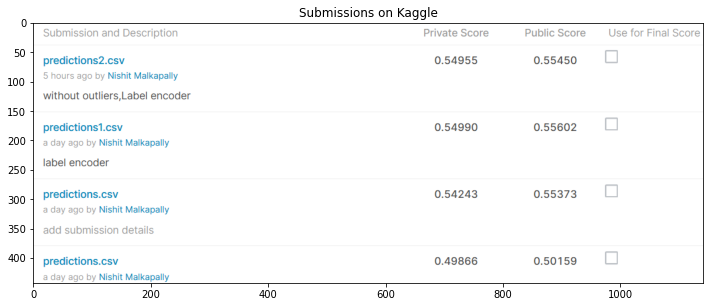

In [248]:
plt.figure(figsize=(12,6))
x=plt.imread('submissions.PNG')
plt.imshow(x)
plt.title('Submissions on Kaggle')

- The one with highest score is obtained using xgboost on label encoder features with selected features

- Xgboost with outliers and label encoded has much high r2 score og 0.65 than other models 
- Linear regression and Decision trees perform almost equally
- SVM with rbf kernel is not fitting on the data so ignoring SVM's
- Much hyperparamter tuning of decision trees and Xgboost can increase the models performance
- XGboost with label encoding has private Lb score of 0.54990 and public Lb of 0.5560 we can still try increasing the models performance with some more FE and hypertuning